In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Simple linear regression

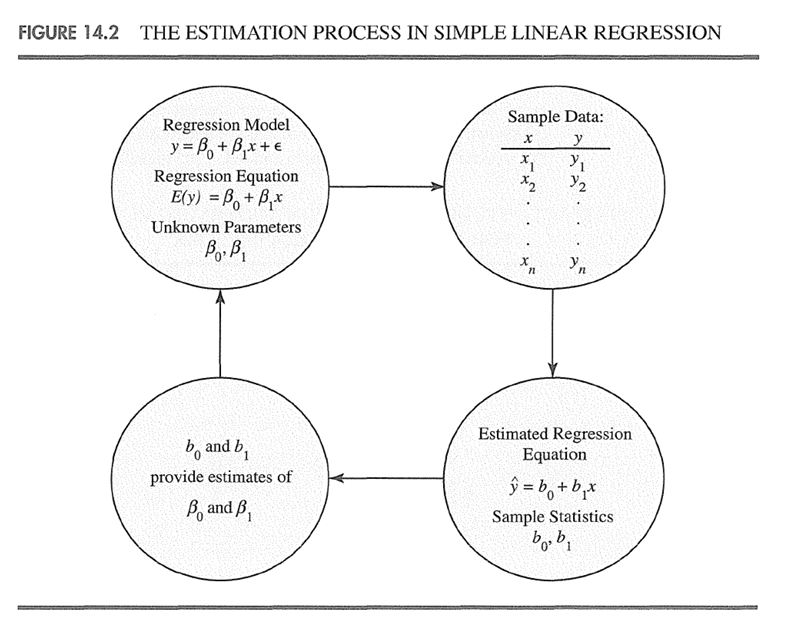



In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
# Load the dataset
nfb = pd.read_csv('/content/drive/MyDrive/data analysis and coding/nfb.csv')

In [ ]:
# Perform the linear regression
linear_model = ols('nfb["fbuse"] ~ nfb["narcissism"]', data=nfb).fit()
print(linear_model.summary())

In [ ]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(linear_model)
print(anova_table)

### checking equal variance (aka homoscedasticity) assumption

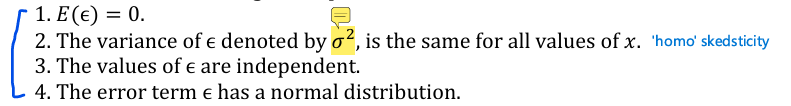



In [ ]:
# Calculate residuals
residuals = linear_model.resid

In [ ]:
# Plot the residuals against the independent variable (narcissism)
plt.figure(figsize=(4, 3)) # Width = 4 inches, Height = 3 inches
plt.scatter(nfb['narcissism'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Narcissism')
plt.ylabel('Residuals')
plt.title('Residuals vs Narcissism')
plt.show()

등분산성을 검증하는 코드임.   

    오차항 e의 분산은 모든 x값에서 동일하다.
    이는 x가 작든 크든 오차 크기가 일정해야 함을 의미한다.
    만약 x가 커질수록 오차항이 넓어지거나 좁아지면 이분산성을 가진다.
    이런 경우 t검정과f검정이 왜곡된다

    따라서 오차의 분산 x는 랜덤하게 흩어져 있어야 하고, 특정한
    패턴이 나타나면 안된다. (잔차의 폭이 x값에 따라 변하지 않아야 한다)

*Heteroscedasticity (이분산)       homoscedasticity(등분산)*

### checking normality assumption

In [ ]:
# Generate Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

오차항이 정규성을 따르는지 확인하는 Q-Q Plot이다.
line = 's'는 표준화된 직선(standardized line)을 표시하는 것이다.
즉, 잔차가 정규분포를 따를때 나타나야 하는 기준선인 45빨간선을 그려주는 옵션이다.  



# Multiple regression

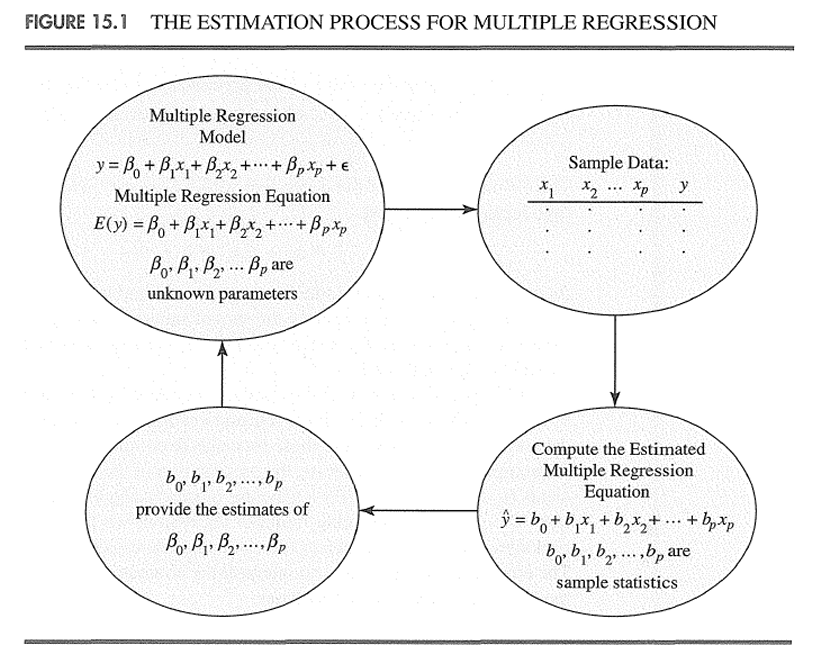

The value of 𝑏1 is not the same in these two cases (𝑏1for narcissim = 3 in
simple linear regression as compared to 𝑏1 for narcissism =
2.40 in multiple regression) . In simple linear regression, we interpret 𝑏1 as an
estimate of the change in 𝑦 for a one-unit change in the independent variable. In
multiple regression analysis, this interpretation must be modified somewhat. That
is, in multiple regression analysis, we interpret each regression coefficient as
follows: 𝑏𝑖 represents an estimate of the change in corresponding to a one-unit
change in 𝑥𝑖 when all other independent variables are held constant.

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# Load the dataset
nfb = pd.read_csv('/content/drive/MyDrive/data analysis and coding/nfb.csv')

In [ ]:
# Multiple regression with two independent variables
multiple_model = ols('nfb["fbuse"] ~ nfb["narcissism"] + nfb["age"]', data=nfb).fit()
print(multiple_model.summary())

R**2 = SSreg / SStotal

1-R**2 = SSerror / SStotal   

R**2 가 크면 클수록
F가 크면 클수록
유의하다는 증거가 강해지는 것
(당연히 p값은 작아질수록)  

In [ ]:
# Perform ANOVA on the fitted model to get the SS error
anova_results = sm.stats.anova_lm(multiple_model)
print("\nANOVA Table (SS error):")
print(anova_results)

In [ ]:
# Fit the null model (intercept only) to get SS total
null_model = ols('nfb["fbuse"] ~ 1', data=nfb).fit()
# Perform ANOVA on the null model
anova_null = sm.stats.anova_lm(null_model)
print("\nANOVA Table (SS total):")
print(anova_null)

절편만 있는 회귀모형의 SSE는
전체제곱합 SStotal이기 때문에
'종속변수 ~ 1'  이렇게 코딩한다     

In [ ]:
# Compare the two models (null model vs full model) for SS regression
anova_comparison = sm.stats.anova_lm(null_model, multiple_model)
print("\nANOVA Table (SS regression):")
print(anova_comparison)

null 모델과 다중회귀모형을 비교해서
회귀제곱합을 자동으로 계산해준다.    

여기서 2는 null모델 자유도 - 다중회귀모형 자유도 = 2이다. 이는 추가된 독립변수가 2개임을 의미한다

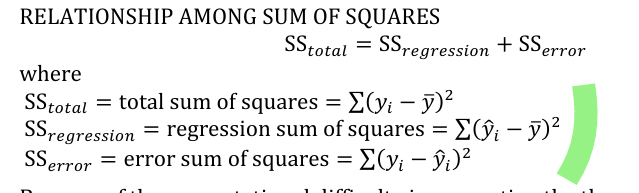

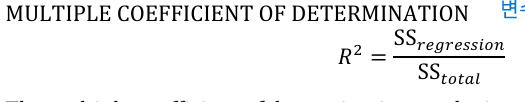

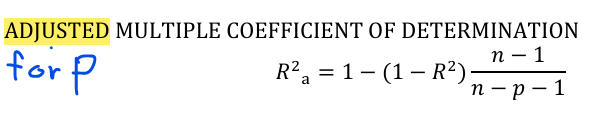

Too many 독립변수를 조정하기 위해 독립변수를        
빼야한다 . p로 조정한다!      

## dummy variable

Nominal variables cannot be used as predictors, unless
they are converted into a special kind of variable, called a dummy variable, having
only two values that are usually coded as 0 and 1.

 the coefficient of the dummy variable
gender will represent the average difference in hours of Facebook use between
males and females, holding constant the other predictor variables.

더미변수의 해석
''다른 변수를 통제한 상태''에서(holding constant)
남성과 여성의 페이스북 '사용시간의 평균차이'! 를 의미한다.

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# Load the dataset
nfb = pd.read_csv('/content/drive/MyDrive/data analysis and coding/nfb.csv')

# Multiple regression with two independent variables
dummy_linear = ols('nfb["fbuse"] ~ nfb["narcissism"] + nfb["age"] +C(nfb["gender"])', data=nfb).fit()
print(dummy_linear.summary())

### interaction

X₁의 기울기(효과)가 X₂의 값에 따라 달라지는 정도
X₂의 기울기(효과)가 X₁의 값에 따라 달라지는 정도
둘 중 어느 해석도 가능하고 동일한 의미다.

    만약 상호작용 효과가 없다면 F의 기울기와 M의 기울기는 같다.  
    하지만, 절편 b0는 바뀐다. 이것이 더미변수의 평균 차이이다. 하지만, 상호작용 효과가 없다고 하면 기울기 같다
    이때 상호작용 효과가 잇으면 기울기가 달라질 것이다(물론, 상호작용 효과 없을 때와 절편은 같겠지)                

In [ ]:
dumint_linear= ols('nfb["fbuse"] ~ nfb["narcissism"]+nfb["age"]+C(nfb["gender"])+nfb["narcissism"]:C(nfb["gender"])',data=nfb).fit()
print(dumint_linear.summary())

### interaction plot

In [ ]:
# Convert gender to a categorical variable with labels
nfb['gender'] = pd.Categorical(nfb['gender'], categories=[0, 1], ordered=False)
nfb['gender'] = nfb['gender'].replace({0: 'male', 1: 'female'})

# Calculate mean of age
mean_age = nfb['age'].mean()

# Plot narcissism and Facebook use for males
plt.scatter(nfb['narcissism'][nfb['gender'] == 'male'], nfb['fbuse'][nfb['gender'] == 'male'], color='blue', label='male', marker='o')

# Plot narcissism and Facebook use for females
plt.scatter(nfb['narcissism'][nfb['gender'] == 'female'], nfb['fbuse'][nfb['gender'] == 'female'], color='red', label='female', marker='o')

# Add regression line for males
male_intercept = 2.8674 + 0.3564 * mean_age
male_slope = 2.5023
plt.plot(nfb['narcissism'], male_intercept + male_slope * nfb['narcissism'], color='blue')

# Add regression line for females
female_intercept = 2.8674 + 3.08460 + 0.3564 * mean_age
female_slope = 2.5023 + 0.7785
plt.plot(nfb['narcissism'], female_intercept + female_slope * nfb['narcissism'], color='red')

# Add legend
plt.legend(loc='upper left')

# Set plot limits, labels, and title
plt.xlim(0, 10)
plt.ylim(0, 50)
plt.xlabel('Narcissism')
plt.ylabel('Facebook Use')
plt.title('Interaction Plot: Narcissism and Facebook Use by Gender')

# Show plot
plt.show()

절편과 기울기가 바뀌었다!!



# check for multicollinearity

The capacity of
multiple regression to disentangle the effects of correlated predictors has its limits,

즉, 다중회귀가 독립변수 그들 스스로의 상관관계를 분리해내는 능력이 있기는 한데, 한계가 있다.

(Pearson’s 𝑟
= .934). Using both as predictors forces the regression analysis to attempt to
disentangle the effects of two variables that are nearly inseparable
    즉, 두 변수를 예측변수로 모두 포함하면, 회귀분석은 거의 구분 불가능한 두 변수의 효과를 억지로 구별해내려고 시도하게 된다

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
# Load the dataset
nfb = pd.read_csv('/content/drive/MyDrive/data analysis and coding/nfb.csv')

# prediciting Facebook hours from narcissism and/or pride

In [ ]:
# predicting Facebook hours from narcissism only
m1 = ols('nfb["fbuse"] ~ nfb["narcissism"]', data=nfb).fit()
print("\nnarcissism only:")
print(m1.summary())

In [ ]:
# predicting Facebook hours from pride only
m2 = ols('nfb["fbuse"] ~ nfb["pride"]', data=nfb).fit()
print("\npride only:")
print(m2.summary())

In [ ]:
# predicting Facebook hours from narcissism and pride
m12 = ols('nfb["fbuse"] ~ nfb["narcissism"] + nfb["pride"]', data=nfb).fit()
print("\nnarcissism and pride:")
print(m12.summary())

다중공선성이 있다면
모델이 완벽해 보여도
독립변수에 문제가 있다     

    다중공선성의 전형적인 징후임!
    전체 모형은 유의한데,
    개별 변수는 유의하지 않음
    모형 전체는 Y를 설명하는데 유의미하지만,
    두 변수가 너무 비슷한 정보를 가지고 있어서
    각각의 독립적인 효과를 분리할 수 없음.

    이 경우 표준오차가 폭등해서
    각 계수가 유의미하지 않게 나온다.   

x1이 y를 예측하는 것 유의했고
x2가 y를 예측하는 것도 유의햇지만
x1과 x2를 같이 넣으니 p값이 모두 높아 유의하지 않았다.

이는 다중공선성 떄문이다.
독립변수들끼리의 선형관계는 나쁜 것이다.

- 다중공선성이 존재하면, 회귀기법은 Facebook 사용시간 중 어느 정도가 자기애 때문이고 어느 정도가 자부심 때문인지 최대한 구분하려고 하지만, 그 결과는 필연적으로 많은 오차를 포함한 매우 거친 추정치가 된다.

### VIF

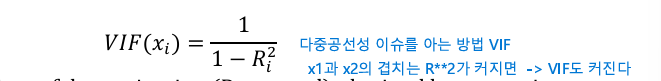

x1을 독변 x2를 종속변수로 넣었을 때의 R**2을 말한느 것이다
이때의 R**2가 크다면 이것은 안 좋은 것 즉, 다중공선성의 문제가 있는 것이다       

In [ ]:
# Regression pride (xi) on narcissism
multi = ols('nfb["pride"] ~ nfb["narcissism"]', data=nfb).fit()
# Get the R-squared value
r_squared_i = multi.rsquared

# Calculate VIF
vif = 1 / (1 - r_squared_i)
print("\nVIF for pride:")
print(vif)

# Logistic regression

*종속변수가 명목형일때*

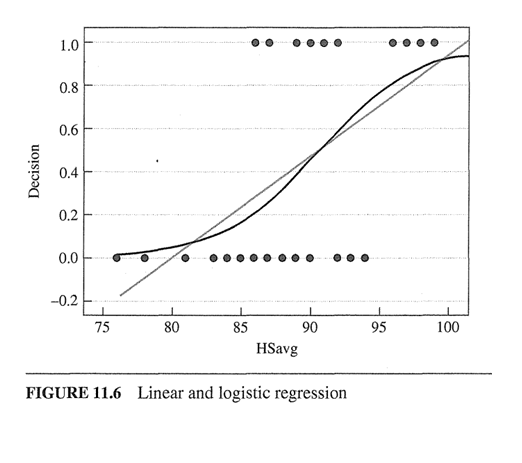

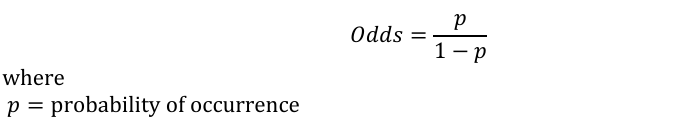

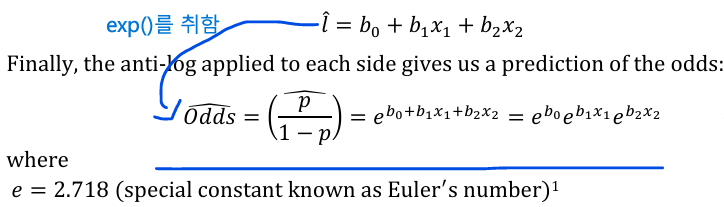

- exp()를 취하면 로그가 없어짐
좌항이 odds^이 된다.   

e**b<1이라면 이것은 아무리 양수더라도 odds^을 감소시키는 것이다.

즉, e**2이 1보다 크냐 작냐를 기준으로 보아야 한다. 그래야 감소관계인지 증가관계인지 파악할 수 있는 것이다.

확률 p를 바로 선형회귀 하면 p가 1을 넘거나 0보다 작아질 수 있기 때문에 이를 해결하기 위해
무한대의 범위 가지는 로그오즈를 사용하는 것임. 즉, 확률을 선형회귀가 가능한 값으로 바꿔줌.              
그리고 다시 확률의 형태로 돌리는거지. 왜냐하면 우리가 알고 싶은것은 확률 p이기 때문에 !!     
그래서 마지막 단계가 아래와 같이 확률 p로 변형하는 것이다.

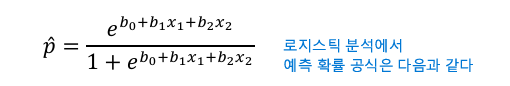

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [ ]:
# Load the dataset
admission=pd.read_csv('/content/drive/MyDrive/data analysis and coding/admission.csv')

In [ ]:
# Logistic regression
logit_model = logit('admission["decision"]~C(admission["gender"])+admission["hsavg"]', data=admission).fit()
print(logit_model.summary())

여기 보면 성별이 유의미하지 않기 때문에          
무시할 수 있다

즉, 모형 전체이 설명력은 존재하는데, 그 설명력은 대부분이 hsvg가 가져온 것이다.
성별은 모형 성능에 거의 기여하지 않는다. 즉, 성별은 통제해야할 필요가 없는
의미 없는 독립변수이며, 성별을 제거해도 모형 설명력은 거의 변하지 않을 것이다!!        

- 고등학교점수가 한 단위 증가할 때 성별을 통제한 상태에서 합격 오즈가 약 30.9% 증가한다.

- 만약 e^*** = 0.57이라면 고등학교 점수가 한 단위 증가할 때 오즈가 원래의 0.57배가 된다. 즉, 43% 감소하는 것을 의미한다